In [2]:
!pip install opencv-python-headless

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import glob

# Specify the path to the folder containing the images
folder_path = 'AI Hackathon REVA University\Predict'

# Define the pattern to match the image files (e.g., all JPEG files)
image_pattern = '*.jpg'

# Retrieve a list of image paths using glob
image_paths = glob.glob(folder_path + '/' + image_pattern)



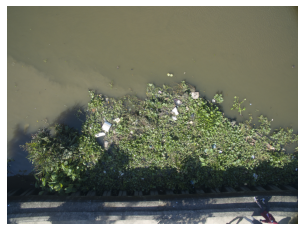

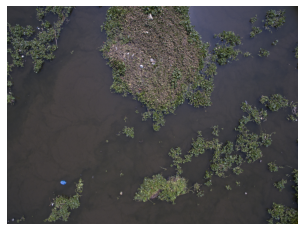

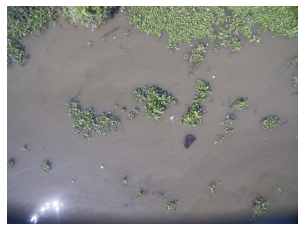

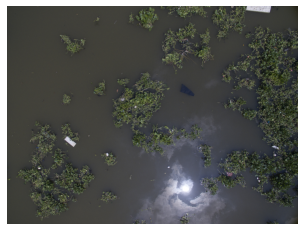

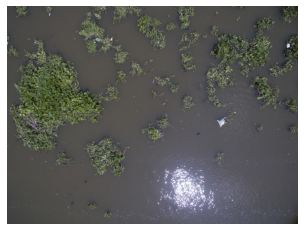

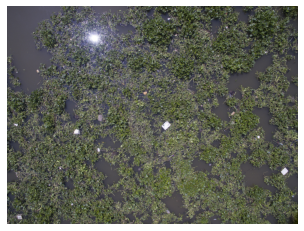

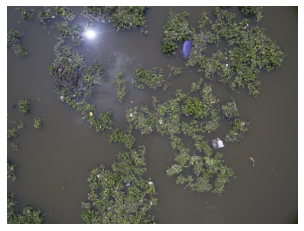

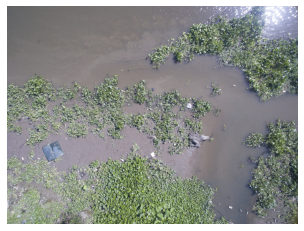

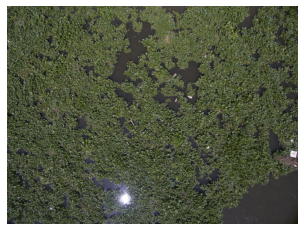

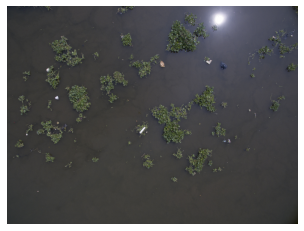

In [3]:
# Print the image paths
for image_path in image_paths:
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.axis('off') 
    plt.show()
    

In [16]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt
!pip install onnx

C:\Users\SHARAL PRIYA\plastic free river\yolov5


Cloning into 'yolov5'...


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\SHARAL PRIYA\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



  Using cached setuptools-68.0.0-py3-none-any.whl (804 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.59.0
    Uninstalling tqdm-4.59.0:
      Successfully uninstalled tqdm-4.59.0


In [12]:
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg')):
        image_path = os.path.join(folder_path,filename)
        image = cv2.imread(image_path)
        blb = cv2.dnn.blobFromImage(image, size=(300, 300), swapRB=True, crop=False)        


In [ ]:
import cv2

# Load pre-trained model for object detection
net = cv2.dnn.readNetFromTensorflow('frozen_inference_graph.pb', 'graph.pbtxt')

# Set the minimum confidence threshold for object detection
min_confidence = 0.5

# Load the input image
img = cv2.imread('input_image.jpg')

# Prepare the image for object detection
blb = cv2.dnn.blobFromImage(image, size=(300, 300), swapRB=True, crop=False)

# Pass the image through the network to perform object detection
net.setInput(blb)
detections = net.forward()

# Iterate over the detected objects
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    # Filter out weak detections
    if confidence > min_confidence:
        class_id = int(detections[0, 0, i, 1])
        class_label = 'Plastic'  # You can customize the label here

        # Extract the coordinates of the bounding box
        height, width = img.shape[:2]
        x1 = int(detections[0, 0, i, 3] * width)
        y1 = int(detections[0, 0, i, 4] * height)
        x2 = int(detections[0, 0, i, 5] * width)
        y2 = int(detections[0, 0, i, 6] * height)

        # Draw the bounding box and label on the image
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, class_label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the labeled image
cv2.imshow('Plastic Detection', im  g)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Load the pre-trained YOLOv3 model
net = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')

# Set the probability threshold for detections
conf_threshold = 0.5

# Load the classes for the YOLOv3 model
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Load the image
image = cv2.imread('plastic_image.jpg')

# Obtain the image dimensions
height, width, _ = image.shape

# Create a blob from the image and pass it through the network
blb = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blb)
output_layers_names = net.getUnconnectedOutLayersNames()
layer_outputs = net.forward(output_layers_names)

# Initialize lists to store detected class IDs, confidences, and bounding boxes
class_ids = []
confidences = []
boxes = []

# Iterate over each output layer
for output in layer_outputs:
    # Iterate over each detection
    for detection in output:
        # Extract the class ID and confidence
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        # Filter out weak predictions
        if confidence > conf_threshold:
            # Scale the bounding box coordinates to the original image size
            box = detection[0:4] * np.array([width, height, width, height])
            (center_x, center_y, bbox_width, bbox_height) = box.astype("int")
            
            # Calculate the top-left corner coordinates
            x = int(center_x - (bbox_width / 2))
            y = int(center_y - (bbox_height / 2))
            
            # Update the lists
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, int(bbox_width), int(bbox_height)])

# Apply non-maximum suppression to eliminate redundant overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, 0.4)

# Count the number of plastic objects
plastic_count = len(indices)

# Draw bounding boxes and labels on the image
font = cv2.FONT_HERSHEY_SIMPLEX
for i in indices:
    i = i[0]
    x, y, w, h = boxes[i]
    label = classes[class_ids[i]]
    confidence = confidences[i]
    
    color = (0, 255, 0)  # Green color for bounding box
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    cv2.putText(image, f'{label}: {confidence:.2f}', (x, y - 10), font, 0.5, color, 2)

# Display the result
cv2.imshow('Plastic Count', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Print the plastic count
print(f"Number of plastic objects: {plastic_count}")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Set the path to your dataset
train_data_dir = 'path/to/your/training_dataset'
test_data_dir = 'path/to/your/testing_dataset'

# Set the desired image size
img_width, img_height = 224, 224

# Set the batch size for training and testing
batch_size = 32

# Set the number of training and testing samples
train_samples = 2000
test_samples = 800

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load and augment the training dataset
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load the testing dataset
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load the MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, steps_per_epoch=train_samples // batch_size, epochs=10)

# Evaluate the model on the testing dataset
evaluation = model.evaluate(test_generator, steps=test_samples // batch_size)
print(f"Accuracy: {evaluation[1] * 100}%")

In [ ]:
from geopy.geocoders import Nominatim

# Function to get GPS coordinates
def get_gps_location(plastic_label):
    geolocator = Nominatim(user_agent="plastic-tracker")
    location = geolocator.geocode(plastic_label)
    if location:
        return location.latitude, location.longitude
    else:
        return None

# Function to generate URL link
def generate_gps_url(latitude, longitude):
    return f"https://www.google.com/maps?q={latitude},{longitude}"

# Example usage
plastic_label = "labeled plastic"
latitude, longitude = get_gps_location(plastic_label)
if latitude and longitude:
    gps_url = generate_gps_url(latitude, longitude)
    print("GPS Location:", latitude, longitude)
    print("URL:", gps_url)
else:
    print("Unable to retrieve GPS location for the labeled plastic.")
dummy = torch.randn(data.shape) 
onfl= "model.onnx"  

torch.onnx.export(model,dummy, onfl)


In [ ]:
data = {
    'IMG_ID': img_ids,
    'PRED_LAB': pred_labs,
    'ACTUAL_CT': actual_cts,
    'PRED_CT': pred_cts,
    'CT_Error': ct_errors,
    '% Error': percent_errors,
    'mAP_Train': mAP_train,
    'mAP_Test': mAP_test,
    'GEO_Tag_URL': geo_tag_urls
}
outn = pd.DataFrame(data)

outn.to_excel('plastic_data.xlsx', index=False)

In [ ]:

onml= onnx.load(onfile)
onnx.checker.check_model(onml)

onnx.save(onml, onfile)
